In [ ]:
# Importar bibliotecas necessárias
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer, load_digits

In [10]:
# Carregando a base de dados
#X, y=load_breast_cancer(return_X_y=True)
#X.shape
X=np.load("Cred_features.npy")
y=np.load("Cred_labels.npy")
print(X.shape)
print(y.shape)

# Validação cruzada
from sklearn.model_selection import train_test_split, GridSearchCV

# Separando da base original uma parte para validação
X,x_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

# Declara o modelo
clf=KNeighborsClassifier()
#clf=DecisionTreeClassifier()
#clf=GaussianNB()
#clf=MLPClassifier(max_iter=300, early_stopping=False, solver='adam')

# parâmetros que o GridSearch utilizará em sua busca (KNN)
parameters=[{'n_neighbors':[1,3,5,7,9,11],
            'weights': ['uniform', 'distance'],
            'p':[1,2]}]

# parâmetros para árvore de classificação (DecisionTree)
#parameters=[{'criterion':['gini', 'entropy', 'log_loss'],
#             'max_depth': [None, 5, 10],
#             'min_samples_split':[2, 5],
#             'splitter':['random', 'best']}]

# parâmetros para MLP (Rede Neural Artificial - MultiLayer Perceptron)
#parameters=[{'hidden_layer_sizes':[16, (16, 8), (16, 8, 4)],
#             'learning_rate': ['constant', 'invscaling'],
#             'learning_rate_init':[0.01, 0.001, 0.0001],
#             'activation':['relu', 'logistic', 'tanh'],
#             'random_state':[10, 46, 37]}]

# parâmetros Naive Bayes
#parameters=[{'var_smoothing':[1e-09,1e-03, 1e-06]}]

# Execução do GridSearch
gs=GridSearchCV(clf, parameters, scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(x_val, y_val)

# Mostrando a tabela de resultados do GrifSearch (opcional)
#from tabulate import tabulate
#import pandas as pd
#df=gs.cv_results_
#print(tabulate(df, headers='keys', tablefmt='psql'))
print("Melhores parâmetros encontrados: ", gs.best_params_)

# Recuperando os melhores resultados
clf=gs.best_estimator_

(56961, 30)
(56961,)
Melhores parâmetros encontrados:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [11]:
result=model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média: %.3f" % result.mean())
print("Desvio padrão: %.3f" % result.std())

Acurácia média: 0.998
Desvio padrão: 0.000


In [ ]:
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

Precision: 0.999
Recall: 0.532
f1: 0.560
Matriz de Confusão


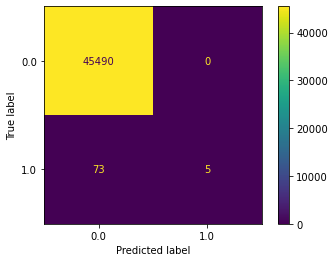

In [12]:
# Usando validação cruzada com T=5 folds
#result=model_selection.cross_val_score(clf, X, y, cv=5)
#print("Acurácia média: %.3f" % result.mean())
#print("Desvio padrão: %.3f" % result.std())

# Calculando a predição para cada exempolo de teste
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

# Calculando a predição para cada exemplo de teste
#y_pred_proba=model_selection.cross_val_predict(clf, X, y, cv=5, method='predict_proba')

# Calcular precisão
precision=precision_score(y, y_pred, average='macro')

# Calcular revocação
recall=recall_score(y, y_pred, average='macro')

# Calcular revocação
f1=f1_score(y, y_pred, average='macro')

print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("f1: %.3f" % f1)

print("Matriz de Confusão")
matrix=confusion_matrix(y, y_pred)
#print(matrix)
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
disp.plot()

In [ ]:
# plotando a árvore após treinamento com a base toda (EXECUTE SOMENTE PARA ÁRVORE)
from sklearn import tree

# carregando a base com todos os detalhes
base=load_breast_cancer()
X=base.data
y=base.target
att=base.feature_names

clf=gs.best_estimator_
clf.fit(X,y)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(clf, feature_names=att, filled=True, ax=ax, fontsize=40)

print(clf.feature_importances_)